In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
import numpy as np
import cv2
import random
from PIL import Image
import matplotlib.pyplot as plt
import os
from inputdatabuilder import InputDataBuilder
from hopfieldnetwork import HopfieldNetwork
# force reload if changed
%aimport hopfieldnetwork
import utils

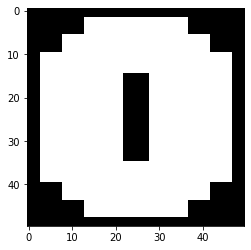

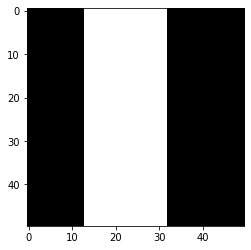

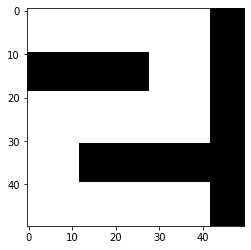

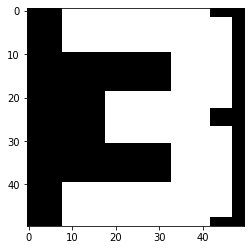

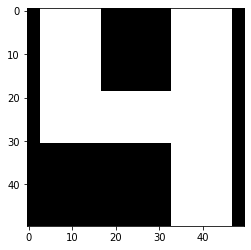

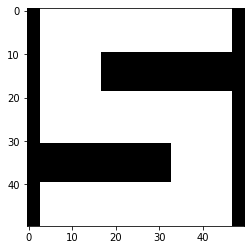

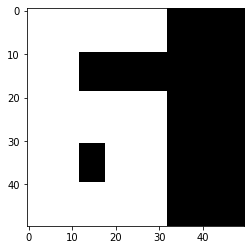

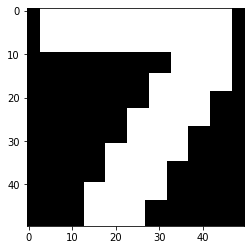

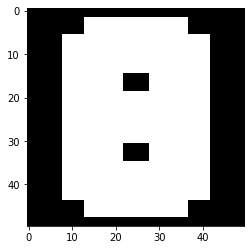

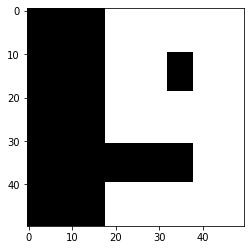

In [23]:
path = "data/digits"
names = os.listdir(path)

fpaths = ["{}/{}".format(path, name) for name in names[:10]]
idb = InputDataBuilder(fpaths, size=(50,50))

for img in idb.deserialize(display=True):
    plt.imshow(Image.fromarray(img), cmap='gray')
    plt.show()


In [13]:
hn = HopfieldNetwork(n=np.prod(idb.size))
X = idb.X
for x in X:
    x[x == 0] = -1

hn.batch_update(X, strengths=[1,1,1,1,5,1,1,1])

Lossy conversion from int32 to uint8. Range [-1, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
4892.0
3644.0
68.0
0.0
Hit MSE goal after 3 iterations


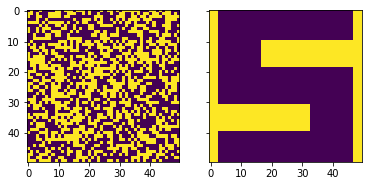

In [13]:
for i in range(0,8):

    hn = HopfieldNetwork(n=np.prod(idb.size))
    X = idb.X
    for x in X:
        x[x == 0] = -1

    for _ in range(300):
        x = utils.create_random_array(hn.n, 0.5)
        X.append(x)

    strengths = [1 for _ in range(0, len(X))]
    strengths[i] = 10

    hn.batch_update(X, strengths=strengths)

    # create random image
    random_image = utils.create_random_array(hn.n, 0.5)

    # evolve, should get strongest image out
    x_recalled = hn.recall(random_image, tol=1e-05, verbose=True, save_evolution=idb.size[0], evolution_name="data/evolution_%s.gif"%i)
    
    x_recalled = x_recalled.astype(np.float64)
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.imshow(random_image.reshape(idb.size))
    ax2.imshow(x_recalled.reshape(idb.size))
    plt.show()

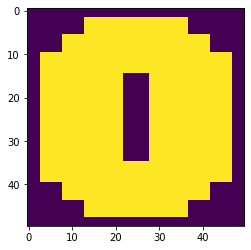

In [52]:
Y = np.copy(idb.X)
for y in Y:
    y[y==0] = -1
plt.imshow(Y[0].reshape(idb.size))
plt.show()

In [55]:
# retrain with no strength
hn = HopfieldNetwork(n=np.prod(idb.size))
X = idb.X
for x in X:
    x[x == 0] = -1

hn.batch_update(X)

3248.0
180.0
320.0
0.0
Hit MSE goal after 3 iterations


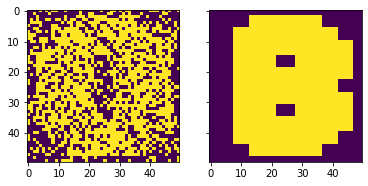

3096.0
0.0
Hit MSE goal after 1 iterations


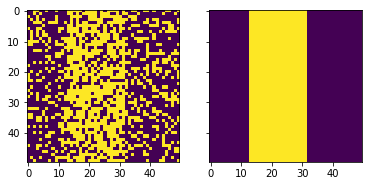

3044.0
64.0
492.0
440.0
520.0
340.0
404.0
40.0
0.0
Hit MSE goal after 8 iterations


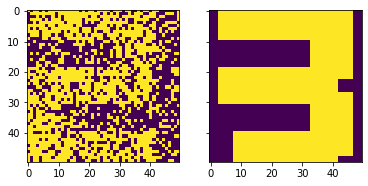

3012.0
120.0
64.0
0.0
Hit MSE goal after 3 iterations


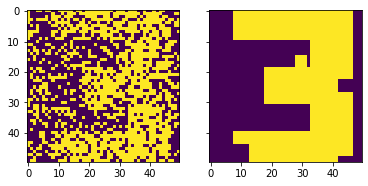

3060.0
80.0
0.0
Hit MSE goal after 2 iterations


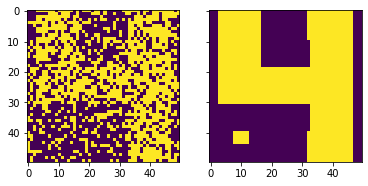

3352.0
40.0
0.0
Hit MSE goal after 2 iterations


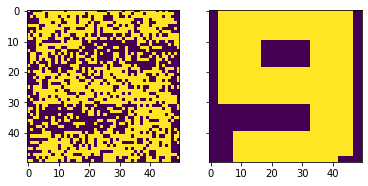

2948.0
16.0
0.0
Hit MSE goal after 2 iterations


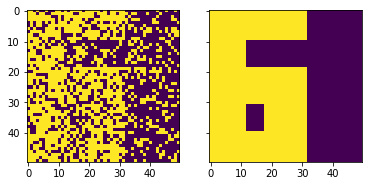

3180.0
512.0
584.0
116.0
0.0
Hit MSE goal after 4 iterations


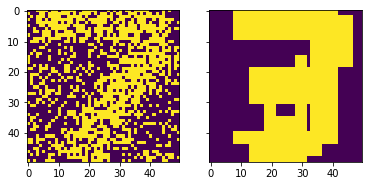

2992.0
0.0
Hit MSE goal after 1 iterations


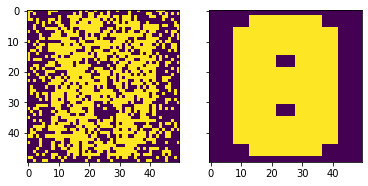

2904.0
296.0
0.0
Hit MSE goal after 2 iterations


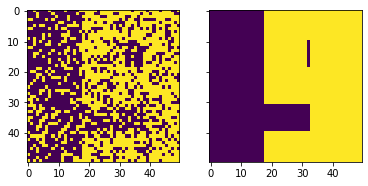

In [5]:
# recall all. Works best when all strengths are the same 
noisy_imgs = idb.get_salt_pepper_noisy_imgs(p_flip=0.3)
for i,img in enumerate(noisy_imgs):
    x_noisy = img.flatten()
    x_noisy = x_noisy.astype('int8')
    x_noisy[x_noisy == 0] = -1
    # recall image
    x_recalled = hn.recall(x_noisy, tol=1e-05, verbose=True)
    x_recalled = x_recalled.astype(np.float64)
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.imshow(x_noisy.reshape(idb.size))
    ax2.imshow(x_recalled.reshape(idb.size))
    plt.show()

    # to save
    # cv2.imwrite('noise_%s.png'%i, x_noisy.reshape(idb.size) * 255)
    # cv2.imwrite('recalled_%s.png'%i, x_recalled.reshape(idb.size) * 255)